In [2]:
import requests
city='Pune'
url='http://api.waqi.info/feed/' + city + '/?token='
api_key='paste your api key here'

main_url=url+api_key
r=requests.get(main_url)
data=r.json()['data']
data

{'aqi': 36,
 'idx': 3760,
 'attributions': [{'url': 'http://cpcb.nic.in/',
   'name': 'CPCB - India Central Pollution Control Board',
   'logo': 'India-CPCB.png'},
  {'url': 'http://safar.tropmet.res.in/',
   'name': 'SAFAR - System of Air Quality Forecasting, Indian Institute of Tropical Meteorology, India',
   'logo': 'India-IITM.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [18.529603, 73.849586],
  'name': 'Shivajinagar, Pune, Pune, India',
  'url': 'https://aqicn.org/city/pune/shivajinagar'},
 'dominentpol': 'o3',
 'iaqi': {'co': {'v': 51},
  'dew': {'v': 22.1},
  'h': {'v': 49},
  'no2': {'v': 38},
  'o3': {'v': 36},
  'p': {'v': 943.8},
  'pm10': {'v': 32},
  'pm25': {'v': 35},
  't': {'v': 28},
  'w': {'v': 0.73}},
 'time': {'s': '2020-08-30 19:00:00',
  'tz': '+05:30',
  'v': 1598814000,
  'iso': '2020-08-30T19:00:00+05:30'},
 'forecast': {'daily': {'o3': [{'avg': 9,
     'day': '2020-08-28',
     'max': 15,
     'min': 4}

In [8]:
aqi=data['aqi']
iaqi=data['iaqi']


for i in iaqi.items():
    print(i[0],':',i[1]['v'])

co : 51
dew : 22.1
h : 49
no2 : 38
o3 : 36
pm10 : 32
pm25 : 35
t : 28
w : 0.73


In [7]:
del iaqi["p"]

In [9]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',so2)
print('pm25 :',pm25)

Pune AQI : 36 

Individual Air quality
Dew : {'v': 22.1}
no2 : {'v': 38}
Ozone : {'v': 36}
sulphur : Nil
pm10 : Nil
pm25 : {'v': 35}


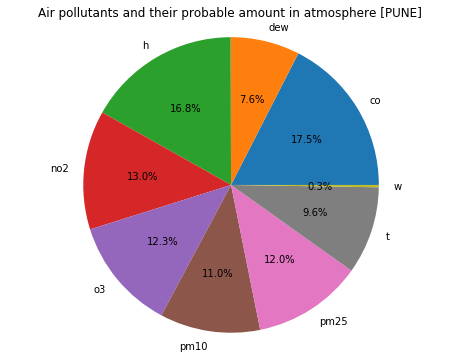

In [12]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]

plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%')

plt.title('Air pollutants and their probable amount in atmosphere [PUNE]')

plt.axis('equal')
plt.show()

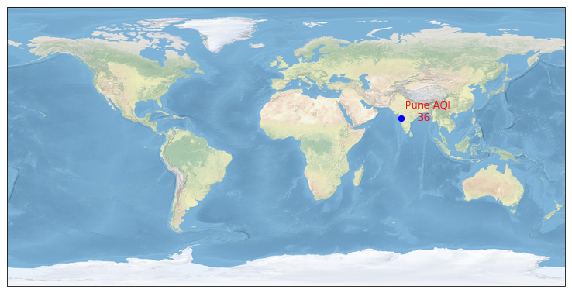

In [14]:
import cartopy.crs as ccrs

geo = data['city']['geo']

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0],color='green')
plt.text(geo[1] + 3,geo[0]-2,f'{city} AQI \n    {aqi}',color='red')

plt.show()


In [21]:
import pandas as pd
#csv_path="C:\Users\rohit\Downloads\nigdi-airquality.csv"
df=pd.read_csv(r"C:\Users\rohit\Downloads\nigdi-airquality.csv")
df.head(10)

,date,pm25,pm10,o3,no2,co
0,2020/8/1,20,31,36,38,
1,2020/8/2,28,30,44,34,
2,2020/8/3,27,18,44,31,
3,2020/8/5,17,20,53,31,
4,2020/8/6,20,22,53,31,
5,2020/8/7,18,23,36,31,
6,2020/8/8,22,26,48,32,
7,2020/8/9,24,29,48,33,
8,2020/8/10,27,23,43,31,
9,2020/8/11,27,22,42,31,51


In [45]:
df= df.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10", 
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

df.head(5)

,date,pm25,pm10,o3,no2,co
0,2020-08-01,20,31,36,38,
1,2020-08-02,28,30,44,34,
2,2020-08-03,27,18,44,31,
3,2020-08-05,17,20,53,31,
4,2020-08-06,20,22,53,31,


In [37]:
df['date'] = pd.to_datetime(df.date)

df21 = df.loc[df['date'] > '2020-03-24']
df21 = df21.sort_values(by = 'date')
DF=df21.head(21)

In [38]:
DF

,date,pm25,pm10,o3,no2,co
169,2020-03-25,74,66,75,11,72
170,2020-03-26,61,66,82,10,78
171,2020-03-27,61,75,75,10,58
172,2020-03-28,70,69,86,12,54
173,2020-03-29,65,66,95,12,42
174,2020-03-30,62,64,97,11,28
175,2020-03-31,59,64,91,11,25
115,2020-04-01,59,67,87,10,24
116,2020-04-02,62,81,89,11,23
117,2020-04-03,76,84,95,11,36


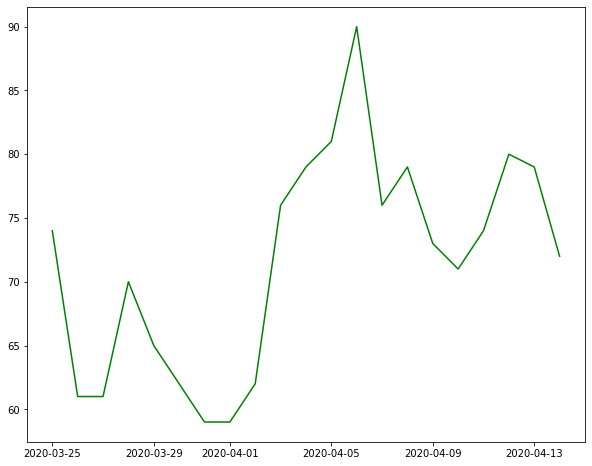

In [41]:
dates=DF['date']
pm25=DF['pm25']
pm25=[int(i) for i in pm25]

plt.figure(figsize=(10,8))
plt.plot(dates,pm25,color='green')
plt.show()

In [44]:
mask=(df['date'] >= "2020-03-05") & (df['date'] < "2020-03-25")
past_21=df.loc[mask]
past_21

,date,pm25,pm10,o3,no2,co
149,2020-03-05,59,65,79,13,85
150,2020-03-06,50,43,71,12,77
151,2020-03-07,36,55,92,18,71
152,2020-03-08,44,70,79,21,66
153,2020-03-09,54,62,71,17,53
154,2020-03-10,48,44,78,13,67
155,2020-03-11,36,37,78,14,60
156,2020-03-12,31,41,97,12,59
157,2020-03-13,34,63,108,17,55
158,2020-03-14,58,87,106,24,48


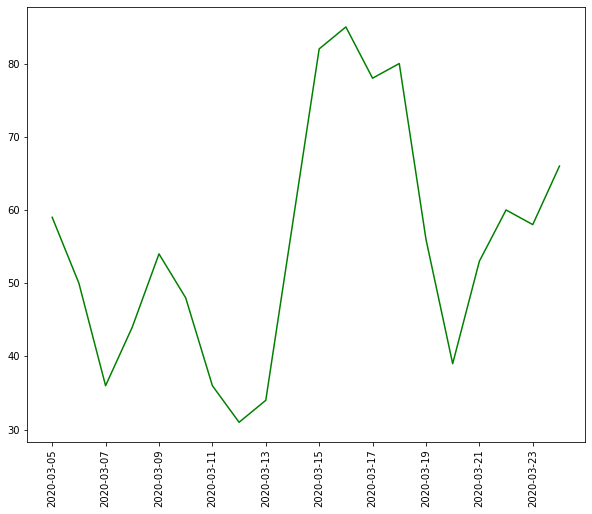

In [70]:

dates=past_21['date']



pm25=past_21['pm25']
pm25=[int(i) for i in pm25]

plt.figure(figsize=(10,8))
plt.plot(dates,pm25,color='green')
plt.xticks(rotation=90)
plt.show()